The following example shows how to use the baseline disturbance estimator. The baseline disturbance estimator assumes the disturbance is a constant. Thus, feeding the tracking error and measured disturbance is sufficient to iterate the estimator, if observability has guarantee. We set the tracking error s to be 0 and give a constant disturbance force for it to track. In this case, the entire estimator become a simple kalman filter. 

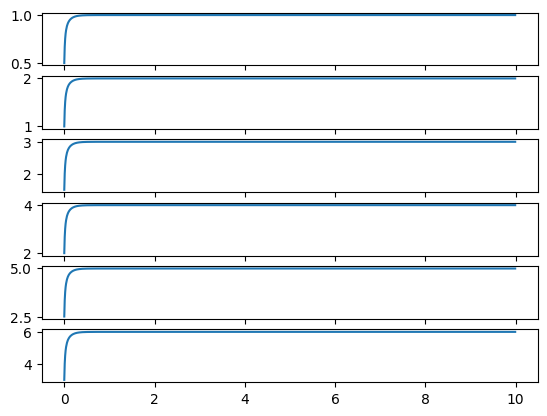

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import time
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
import disturbance_estimator

y = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
s = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

f_x = []
f_y = []
f_z = []
tq_x = []
tq_y = []
tq_z = []
t = np.arange(0, 10, 0.01)

dist_base = disturbance_estimator.BaselineDisturbanceEstimator(0.01)
for _ in t:
    dist_base.step_disturbance(y, s)
    f_x.append(dist_base.f_x.disturbance)
    f_y.append(dist_base.f_y.disturbance)
    f_z.append(dist_base.f_z.disturbance)
    tq_x.append(dist_base.tq_x.disturbance)
    tq_y.append(dist_base.tq_y.disturbance)
    tq_z.append(dist_base.tq_z.disturbance)

fig, axs = plt.subplots(6,1,sharex=True)
axs[0].plot(t, f_x)
axs[1].plot(t, f_y)
axs[2].plot(t, f_z)
axs[3].plot(t, tq_x)
axs[4].plot(t, tq_y)
axs[5].plot(t, tq_z)
plt.show()

On the other hand, in the ML disturbance estimator, input signals to the network is needed in addition to the tracking error and measured disturbance. When the tracking error term is 0, the entire system relies on the observability provided by phi net. If the output of phi net is constant, it forms the C matrix in y = Cx. Then the matrix pair (-lambda, C) need to be full rank when it forms the observability matrix. The higher the dimension of phi, the higher the dimension of a_hat, and thus, the harder to guarantee the observability by observation alone. The motivation of the paper introducing the tracking error term is probability trying to fix this observability issue.

In addition, the kalman filter portion of the estimator (the part that updates covariance matrix P) is vulnerable to system stiffness. When the ouptut of phi net grows large (component value > 30) with dt = 0.01, the estimator will diverge.

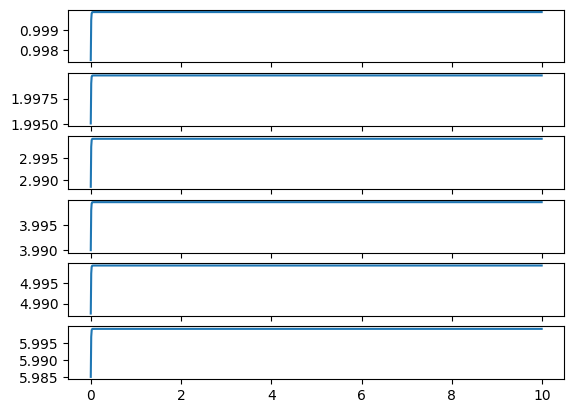

In [2]:
y = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
s = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

position = np.array([0.0, 0.0, 0.0])
v = np.array([0.0, 0.0, 0.0])
q = np.array([1.0, 0.0, 0.0, 0.0])
omega = np.array([0.0, 0.0, 0.0])
f = 1.0
tq = np.array([0.0, 0.0, 0.0])
rotor_speed = np.array([100.0, 100.0, 100.0, 100.0])

dist_ml = disturbance_estimator.DisturbanceEstimator("test", 0.01)

t = np.arange(0, 10.0, 0.01)
f_x = []
f_y = []
f_z = []
tq_x = []
tq_y = []
tq_z = []
for _ in t:
    dist_ml.step_disturbance(position, v, q, omega, f, tq, rotor_speed, y, s)
    f_x.append(dist_ml.f_x.disturbance)
    f_y.append(dist_ml.f_y.disturbance)
    f_z.append(dist_ml.f_z.disturbance)
    tq_x.append(dist_ml.tq_x.disturbance)
    tq_y.append(dist_ml.tq_y.disturbance)
    tq_z.append(dist_ml.tq_z.disturbance)
    # print(_)
fig, axs = plt.subplots(6,1,sharex=True)
axs[0].plot(t, f_x)
axs[1].plot(t, f_y)
axs[2].plot(t, f_z)
axs[3].plot(t, tq_x)
axs[4].plot(t, tq_y)
axs[5].plot(t, tq_z)
plt.show()